In [1]:
#import dependencies
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as sts
from scipy import stats
from scipy.stats import linregress
import gmaps
import os
import json
import pprint as pprint
import seaborn as sn
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2]:
sample_data = pd.read_csv('output_data/top_50.csv')
sample_data.head()

,State,County,Returns Total,Total AGI,Outflow,Outflow AGI,Inflow,Inflow AGI,Net Inflow(Outflow),Flow(%),Unemployment Rate(%),1 Bed Average,2 Bed Average,Highest Marginal Income Tax Rate (%),Median Home Price 2017
0,CA,Los Angeles County,3732877,330740878,154210,11436416,120440,8511638,-33770,-0.905,4.7,1388,1798,12.30,647932
1,IL,Cook County,2011039,178442056,100145,8657421,77478,5723827,-22667,-1.127,4.0,1099,1279,4.95,260542
2,TX,Harris County,1519470,120110671,93935,6744329,82339,5181538,-11596,-0.763,4.4,936,1146,0.00,187271
3,AZ,Maricopa County,1471961,117024435,67741,4328950,88231,6573244,20490,1.392,4.1,870,1082,4.54,285478
4,CA,San Diego County,1248474,110803163,71198,4891830,67893,4650336,-3305,-0.265,3.3,1400,1816,12.30,611062


(array([ 1.,  2.,  4.,  2.,  5.,  7., 11.,  2.,  4.,  4.,  1.,  2.,  2.,
         1.,  0.]),
 array([-2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,
         0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75]),
 <a list of 15 Patch objects>)

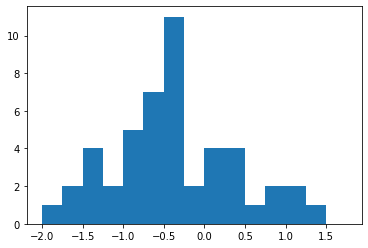

In [3]:
# Visualize distribution of dependent variable to get an understanding of our dependent variable's distribution 
bins = np.arange(-2.0, 2.0, 0.25)
plt.hist(sample_data["Flow(%)"], bins=bins)

In [4]:
# Run correlation matrix to get a view of which independent variables may be most significant 

correlations_df =sample_data.drop(columns=['Returns Total', 'Outflow', 'Outflow AGI', 'Inflow', 'Inflow AGI', 'Net Inflow(Outflow)'])

corr_matrix = correlations_df.corr()
corr_matrix

,Total AGI,Flow(%),Unemployment Rate(%),1 Bed Average,2 Bed Average,Highest Marginal Income Tax Rate (%),Median Home Price 2017
Total AGI,1.000000,-0.241353,0.052825,0.333386,0.362729,0.241977,0.466211
Flow(%),-0.241353,1.000000,0.007675,-0.521377,-0.491975,-0.270379,-0.406334
Unemployment Rate(%),0.052825,0.007675,1.000000,-0.235094,-0.254997,0.009760,-0.304324
1 Bed Average,0.333386,-0.521377,-0.235094,1.000000,0.991624,0.515023,0.896094
2 Bed Average,0.362729,-0.491975,-0.254997,0.991624,1.000000,0.525387,0.898952
Highest Marginal Income Tax Rate (%),0.241977,-0.270379,0.009760,0.515023,0.525387,1.000000,0.601128
Median Home Price 2017,0.466211,-0.406334,-0.304324,0.896094,0.898952,0.601128,1.000000


Based on the correlation matrix, the three independent variables "1 Bed Average", "2 Bed Average", and "Median Home Price 2017" may have the most significance for predicting "Flow(%)". Below, we will test that significance in both Multivariate Regression Analyses and Univariate Regression Analyses. 

A variety of multivariate regression models have been run to examine the effect of removing 1 or 2 of the three independent variables mentioned above. These are singled-out due to their having the highest correlations to the "Flow(%)", as well as due to their having a high correlation with each other. 

In [5]:
# Run multivariate regression analysis to check significance of entire set of independent variables

# Create x and y values 
x_val = sample_data[["Total AGI","Unemployment Rate(%)","1 Bed Average","2 Bed Average","Highest Marginal Income Tax Rate (%)","Median Home Price 2017"]]
y_val = sample_data[["Flow(%)"]]

# Create Ordinary Least Squares linear regression analysis
X2 = sm.add_constant(x_val)
est = sm.OLS(y_val, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                Flow(%)   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     4.022
Date:                Fri, 31 Jan 2020   Prob (F-statistic):            0.00277
Time:                        19:14:32   Log-Likelihood:                -50.943
No. Observations:                  50   AIC:                             115.9
Df Residuals:                      43   BIC:                             129.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


C:\Users\josep\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [6]:
# Entire set of independent variables, ex- "1 Bed Average"

# Create x and y values
x_val = sample_data[["Total AGI","Unemployment Rate(%)","2 Bed Average","Highest Marginal Income Tax Rate (%)","Median Home Price 2017"]]
y_val = sample_data[["Flow(%)"]]

# Create Ordinary Least Squares linear regression analysis
X = sm.add_constant(x_val)
est = sm.OLS(y_val, X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                Flow(%)   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     3.214
Date:                Fri, 31 Jan 2020   Prob (F-statistic):             0.0147
Time:                        19:14:32   Log-Likelihood:                -54.297
No. Observations:                  50   AIC:                             120.6
Df Residuals:                      44   BIC:                             132.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [7]:
# Entire set of independent variables, ex- "2 Bed Average"

# Create x and y values
x_val = sample_data[["Total AGI","Unemployment Rate(%)","1 Bed Average","Highest Marginal Income Tax Rate (%)","Median Home Price 2017"]]
y_val = sample_data[["Flow(%)"]]

# Create linear regression analysis
X = sm.add_constant(x_val)
est = sm.OLS(y_val, X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                Flow(%)   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     4.059
Date:                Fri, 31 Jan 2020   Prob (F-statistic):            0.00408
Time:                        19:14:32   Log-Likelihood:                -52.598
No. Observations:                  50   AIC:                             117.2
Df Residuals:                      44   BIC:                             128.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [8]:
# Entire set of independent variables, ex- "Median Home Price 2017"

# Create x and y values
x_val = sample_data[["Total AGI","Unemployment Rate(%)","1 Bed Average","2 Bed Average","Highest Marginal Income Tax Rate (%)"]]
y_val = sample_data[["Flow(%)"]]

# Create Ordinary Least Squares linear regression analysis
X = sm.add_constant(x_val)
est = sm.OLS(y_val, X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                Flow(%)   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     4.325
Date:                Fri, 31 Jan 2020   Prob (F-statistic):            0.00275
Time:                        19:14:32   Log-Likelihood:                -52.086
No. Observations:                  50   AIC:                             116.2
Df Residuals:                      44   BIC:                             127.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [9]:
# Entire set of independent variables, ex- "2 Bed Average" and "Median Home Price 2017"

# Create x and y values 
x_val = sample_data[["Total AGI","Unemployment Rate(%)","1 Bed Average","Highest Marginal Income Tax Rate (%)"]]
y_val = sample_data[["Flow(%)"]]

# Create Ordinary Least Squares linear regression analysis
X = sm.add_constant(x_val)
est = sm.OLS(y_val, X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                Flow(%)   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     4.579
Date:                Fri, 31 Jan 2020   Prob (F-statistic):            0.00346
Time:                        19:14:32   Log-Likelihood:                -53.544
No. Observations:                  50   AIC:                             117.1
Df Residuals:                      45   BIC:                             126.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


Based on the above multivariate linear regression analysis, the two factors with the lowest p-values are "1 Bed Average" and "2 Bed Average", the "1 Bedroom Average" is the only statistically significant independent variable (as part of the multivariate regression model). These two values are shown first in the scatterplots and linear regression visualizations, and the "Median Home Price 2017" variable, given that it had the third highest correlation to "Flow(%)" is shown third. Other variables are also shown for illustrative purposes to demonstrate our findings. 

In [10]:
#Datasets 
flow_values = sample_data['Flow(%)']
employ_values = sample_data['Unemployment Rate(%)']
agi_values = sample_data['Total AGI']
state_tax_values = sample_data['Highest Marginal Income Tax Rate (%)']
home_price_values = sample_data['Median Home Price 2017']
rent_cost_1bed = sample_data["1 Bed Average"]
rent_cost_2bed = sample_data["2 Bed Average"]

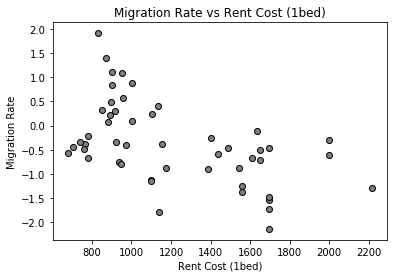

In [11]:
#Rent (1 bedroom) vs Flows
plt.scatter(rent_cost_1bed, flow_values, marker='o', facecolors='grey', edgecolors='black')
plt.title('Migration Rate vs Rent Cost (1bed)')
plt.xlabel('Rent Cost (1bed)')
plt.ylabel('Migration Rate')
#save the plot to an image file
plt.savefig('output_data/migration_1bedrent.png')

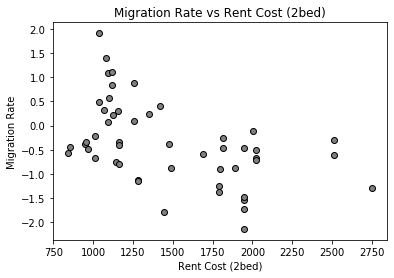

In [12]:
#Rent (2 bedroom) vs Flows
plt.scatter(rent_cost_2bed, flow_values, marker='o', facecolors='grey', edgecolors='black')
plt.title('Migration Rate vs Rent Cost (2bed)')
plt.xlabel('Rent Cost (2bed)')
plt.ylabel('Migration Rate')
#save the plot to an image file
plt.savefig('output_data/migration_2bedrent.png')

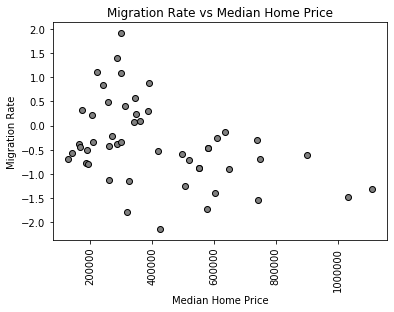

In [13]:
#inflows/outflows vs Median home price
plt.scatter(home_price_values, flow_values, marker='o', facecolors='grey', edgecolors='black')
plt.title('Migration Rate vs Median Home Price')
plt.xlabel('Median Home Price')
plt.ylabel('Migration Rate')
plt.xticks(rotation=90)
#save the plot to an image file
plt.savefig('output_data/migration_home.png')

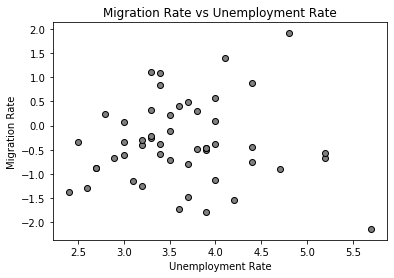

In [14]:
#Unemployment vs Flows
plt.scatter(employ_values, flow_values, marker='o', facecolors='grey', edgecolors='black')
plt.title('Migration Rate vs Unemployment Rate')
plt.xlabel('Unemployment Rate')
plt.ylabel('Migration Rate')
#save the plot to an image file
plt.savefig('output_data/migration_unemploy.png')

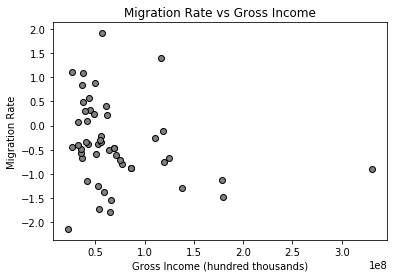

In [15]:
#Gross Income vs Flows
plt.scatter(agi_values, flow_values, marker='o', facecolors='grey', edgecolors='black')
plt.title('Migration Rate vs Gross Income')
plt.xlabel('Gross Income (hundred thousands)')
plt.ylabel('Migration Rate')
#save the plot to an image file
plt.savefig('output_data/migration_income.png')

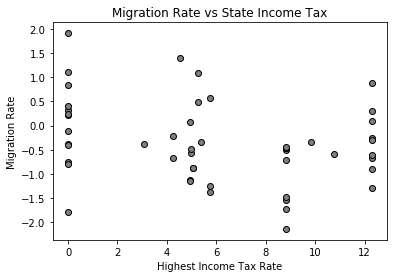

In [16]:
# Income Tax vs Flows
plt.scatter(state_tax_values, flow_values, marker='o', facecolors='grey', edgecolors='black')
plt.title('Migration Rate vs State Income Tax')
plt.xlabel('Highest Income Tax Rate')
plt.ylabel('Migration Rate')
#save the plot to an image file
plt.savefig('output_data/migration_tax.png')

The r-value is: -0.5213772770791867
The p-value is: 0.00010341656368435993
This variable is statistically significant based on a univariate regression.


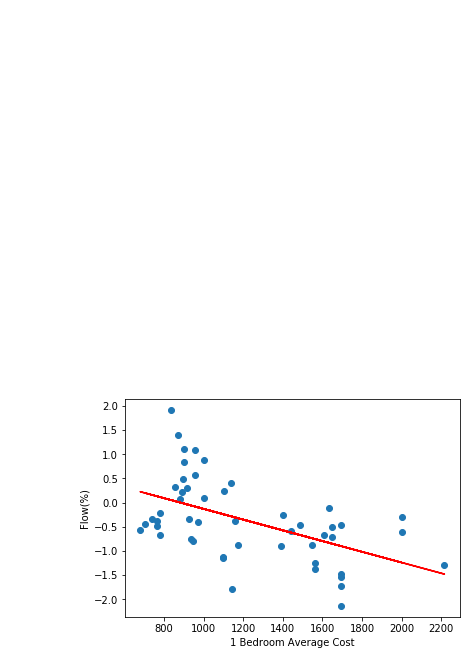

In [17]:
# 1 Bedroom rent cost 
x_values = sample_data['1 Bed Average']
y_values = sample_data['Flow(%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('1 Bedroom Average Cost')
plt.ylabel('Flow(%)')
print(f"The r-value is: {rvalue}")
print(f"The p-value is: {pvalue}")
if pvalue < 0.05:
    print(f"This variable is statistically significant based on a univariate regression.")
plt.savefig('output_data/migration_1bed_regress.png')

The r-value is: -0.49197548153563997
The p-value is: 0.0002848709833402682
This variable is statistically significant based on a univariate regression.


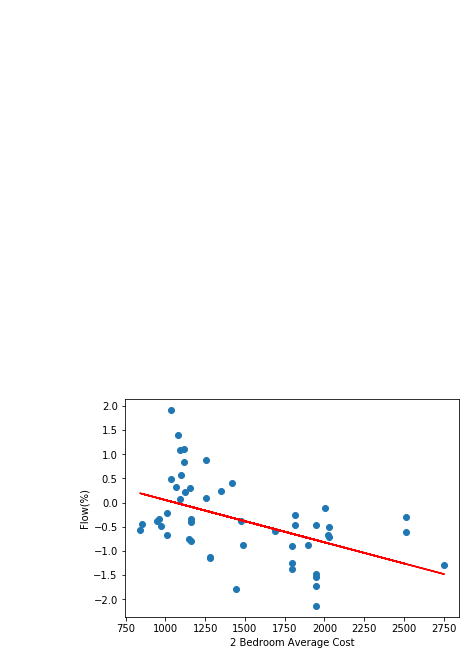

In [18]:
# 2 Bedroom rent cost 
x_values = sample_data['2 Bed Average']
y_values = sample_data['Flow(%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('2 Bedroom Average Cost')
plt.ylabel('Flow(%)')
print(f"The r-value is: {rvalue}")
print(f"The p-value is: {pvalue}")
if pvalue < 0.05:
    print(f"This variable is statistically significant based on a univariate regression.")
plt.savefig('output_data/migration_2bed_regress.png')

The r-value is: -0.4063336104919423
The p-value is: 0.003411307810251468
This variable is statistically significant based on a univariate regression.


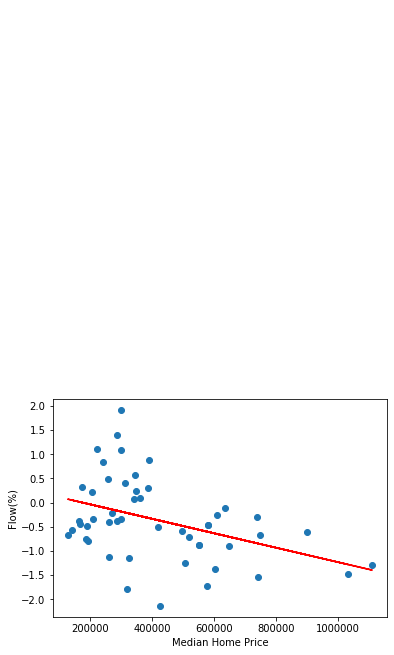

In [19]:
# Median Home Price
x_values = sample_data['Median Home Price 2017']
y_values = sample_data['Flow(%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Median Home Price')
plt.ylabel('Flow(%)')
print(f"The r-value is: {rvalue}")
print(f"The p-value is: {pvalue}")
if pvalue < 0.05:
    print(f"This variable is statistically significant based on a univariate regression.")
plt.savefig('output_data/migration_home_regress.png')

The r-value is: 0.00767469475802832
The p-value is: 0.9578144300819248


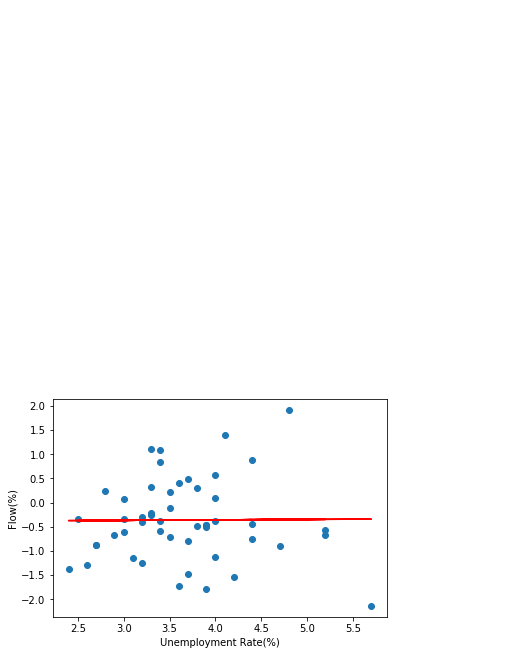

In [20]:
# Unemployment rate
x_values = sample_data['Unemployment Rate(%)']
y_values = sample_data['Flow(%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Unemployment Rate(%)')
plt.ylabel('Flow(%)')
print(f"The r-value is: {rvalue}")
print(f"The p-value is: {pvalue}")
if pvalue < 0.05:
    print(f"This variable is statistically significant based on a univariate regression.")
plt.savefig('output_data/migration_employ_regress.png')

The r-value is: -0.24135279715633354
The p-value is: 0.09131143399205327


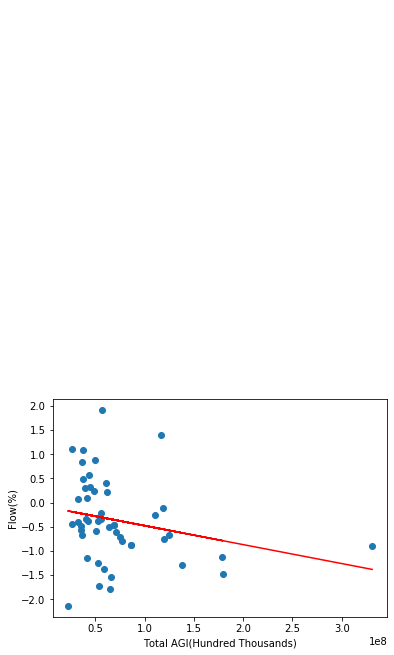

In [21]:
# Total AGI
x_values = sample_data['Total AGI']
y_values = sample_data['Flow(%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Total AGI(Hundred Thousands)')
plt.ylabel('Flow(%)')
print(f"The r-value is: {rvalue}")
print(f"The p-value is: {pvalue}")
if pvalue < 0.05:
    print(f"This variable is statistically significant based on a univariate regression.")
plt.savefig('output_data/migration_income_regress.png')

The r-value is: -0.2703785777408326
The p-value is: 0.05755828110805285


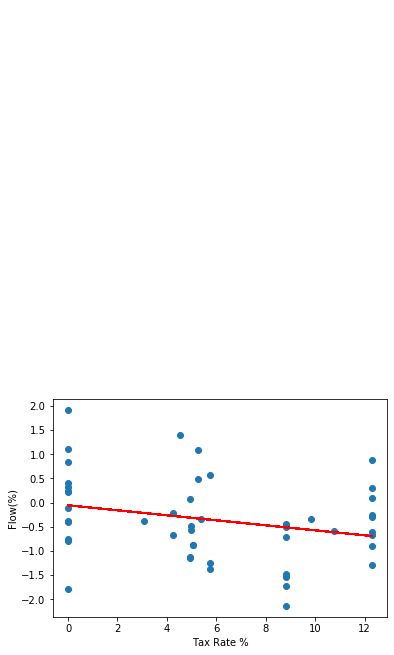

In [22]:
# Tax rate
x_values = sample_data['Highest Marginal Income Tax Rate (%)']
y_values = sample_data['Flow(%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Tax Rate %')
plt.ylabel('Flow(%)')
print(f"The r-value is: {rvalue}")
print(f"The p-value is: {pvalue}")
if pvalue < 0.05:
    print(f"This variable is statistically significant based on a univariate regression.")
plt.savefig('output_data/migration_tax_regress.png')